# Comparative Analysis of Machine Learning Methods for COVID-19 Symptom Severity

## Below is code for importing libraries and the COVID-19 dataset

## The data is organized into a table with rows for each patient in the study and the columns for each metric tested. This includes:
- Serum IL-1b levels
- Serum IL6 levels
- Serum TNF-A levels
- Age
- Sex
- Smoker/Non-Smoker
- Diabetic/Non-Diabetic
- Hypertension/No Hypertension
- Race


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

# Importing Dataset
df = pd.read_table('data.tsv', index_col=0)
df

,IL1B,IL6,IL8,TNFA,Age,BMI,Sex,Smoking,Diabetes,Hypertension,Hispanic,White,Afr. Amer.,Severity
SUB210704,-0.736966,6.882643,5.346957,4.177918,67.0,23.190000,0,0,1,0,0,1,0,1
SUB210705,-1.321928,6.145677,4.872829,4.263034,37.0,39.940000,0,0,0,0,0,1,0,1
SUB210706,-0.736966,7.870365,5.897240,4.177918,65.0,22.960000,1,0,0,0,0,0,1,1
SUB210707,-1.321928,4.949535,5.459432,3.963474,68.0,29.450000,0,0,0,0,0,0,1,1
SUB210708,-1.321928,6.768184,4.432959,4.285402,66.0,28.501965,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUB213034,-0.514573,6.281698,5.339850,3.981853,43.0,30.000000,1,0,0,1,0,0,0,1
SUB213035,-3.321928,2.169925,3.972693,3.906891,68.0,25.270000,1,1,0,1,0,0,0,0
SUB213036,-0.321928,3.137504,4.053111,3.596935,73.0,22.860000,0,0,0,1,1,0,0,0
SUB213037,-3.321928,1.925999,3.560715,2.906891,58.0,34.430000,1,0,0,1,0,1,0,0


## Splitting Inputs and Labels

In [2]:
# Removing "Severity" Column from Training Set and Storing as an Array
InputData = df.drop(columns=["Severity"]).values
InputData

array([[-0.73696559,  6.88264305,  5.34695689, ...,  0.        ,
         1.        ,  0.        ],
       [-1.3219281 ,  6.14567746,  4.87282876, ...,  0.        ,
         1.        ,  0.        ],
       [-0.73696559,  7.87036472,  5.89724043, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.3219281 ,  3.13750352,  4.05311134, ...,  1.        ,
         0.        ,  0.        ],
       [-3.3219281 ,  1.92599942,  3.56071495, ...,  0.        ,
         1.        ,  0.        ],
       [-1.3219281 ,  5.30012372,  6.0768156 , ...,  0.        ,
         0.        ,  1.        ]])

In [3]:
# Slicing Dataset for Severity Column to create Testing Set Array
Label = df['Severity'].values
Label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Normalizing Data

In [4]:
# Standardization Using StandardScalar
InputData = StandardScaler().fit_transform(InputData)
InputData

array([[ 0.40928021,  0.47144678,  0.01716274, ..., -1.4578833 ,
         1.90914543, -0.49253183],
       [ 0.06285592,  0.16164348, -0.30128404, ..., -1.4578833 ,
         1.90914543, -0.49253183],
       [ 0.40928021,  0.88666213,  0.38675908, ..., -1.4578833 ,
        -0.52379457,  2.03032564],
       ...,
       [ 0.65507216, -1.10292328, -0.85184487, ...,  0.68592596,
        -0.52379457, -0.49253183],
       [-1.12157654, -1.6122116 , -1.18256147, ..., -1.4578833 ,
         1.90914543, -0.49253183],
       [ 0.06285592, -0.19380775,  0.50737023, ..., -1.4578833 ,
        -0.52379457,  2.03032564]])

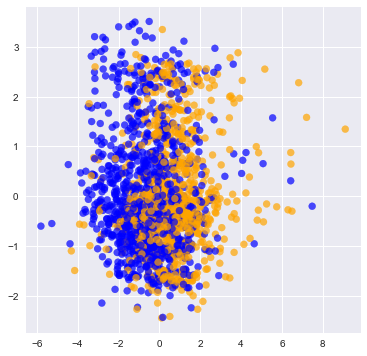

In [5]:
# 2-Dimensional Principal Component Analysis
InputData_PCA = PCA(n_components=2).fit_transform(InputData)

# Creating Testing set colors list to visualize data
Label_Colors = []
for x in Label:
    if x == 0:
        Label_Color = 'blue'
        Label_Colors.append(Label_Color)
    if x == 1:
        Label_Color = 'orange'
        Label_Colors.append(Label_Color)  

# Visualizing Data
plt.style.use("seaborn")
plt.figure(figsize=(6, 6))
plt.scatter(InputData_PCA[:, 0], InputData_PCA[:, 1], c=Label_Colors, alpha=0.7)

The graph above shows a visualization of the 2-dimensional principal component analysis where mild and severe COVID-19 cases are represented as blue and orange points respectively.

## Splitting Training and Test Sets

In [6]:
# Splitting Training and Test Sets for both input and output data
InputData_train, InputData_test, Label_train, Label_test = train_test_split(InputData, Label, random_state=69420)


## Linear Regression Machine Learning

Building linear regression model

In [7]:
# Constructing Linear Regression Model
LinReg = LinearRegression()
LinReg.fit(InputData_train, Label_train)

# Making Predictions Based on the Model
LinPrediction = LinReg.predict(InputData_test)

Analyzing Prediction Accuracy

In [8]:
# Interpreting prediction outputs >=0.5 as severe and <0.5 as mild
LinPrediction_Binaries = []
for x in LinPrediction:
    if x >= 0.5:
        LinPrediction_Binary = 1
        LinPrediction_Binaries.append(LinPrediction_Binary)
    if x < 0.5:
        LinPrediction_Binary = 0
        LinPrediction_Binaries.append(LinPrediction_Binary)

# Calculating Model Accuracy Score
LinRegAccuracy = accuracy_score(Label_test, LinPrediction_Binaries)

# Displaying Output
print("Linear Regression Model Accuracy: ", LinRegAccuracy)

Linear Regression Model Accuracy:  0.7006507592190889


Calculating Precision and Recall

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       259
           1       0.66      0.66      0.66       202

    accuracy                           0.70       461
   macro avg       0.70      0.70      0.70       461
weighted avg       0.70      0.70      0.70       461

Linear Regression AUROC =  0.6965480331816967


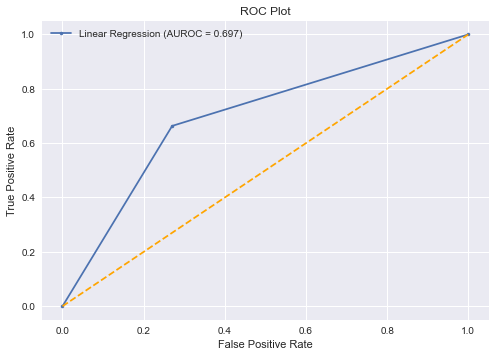

In [9]:
# Printing Precision and Recall
print(classification_report(Label_test, LinPrediction_Binaries))

# Calculating and Displaying Area Under ROC Curve
Lin_fpr, Lin_tpr, thresholds = metrics.roc_curve(Label_test, LinPrediction_Binaries)
Lin_auc = metrics.auc(Lin_fpr, Lin_tpr)
print("Linear Regression AUROC = ", Lin_auc)

# Displaying Reiever Operating Characteristic Curve
plt.plot(Lin_fpr, Lin_tpr, marker='.', label='Linear Regression (AUROC = %0.3f)' % Lin_auc)
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

## k-Nearest Neighbors Machine Learning

In [10]:
# Constructing kNN Model and making predictions
kNN = KNeighborsClassifier()
kNN.fit(InputData_train, Label_train)
kNNPrediction = kNN.predict(InputData_test)

Analyzing Prediction Accuracy

In [11]:
# Calculating Model Accuracy Score
kNNAccuracy = accuracy_score(Label_test, kNNPrediction)

# Displaying Output
print("k-Nearest Neighbors Model Accuracy: ", kNNAccuracy)

k-Nearest Neighbors Model Accuracy:  0.6399132321041214


Calculating Precision and Recall

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       259
           1       0.59      0.59      0.59       202

    accuracy                           0.64       461
   macro avg       0.63      0.63      0.63       461
weighted avg       0.64      0.64      0.64       461

k-Nearest Neighbor AUROC =  0.7172770365839672


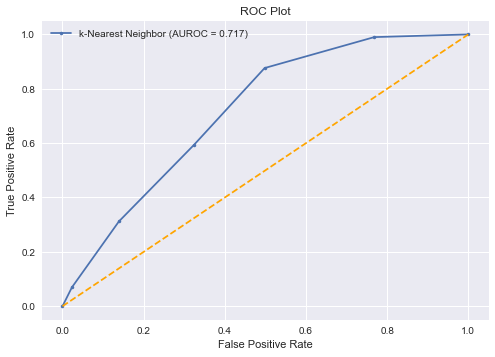

In [12]:
# Printing Precision and Recall
print(classification_report(Label_test, kNNPrediction))

# Calculating kNN Probabilities
kNN_probs = kNN.predict_proba(InputData_test)
kNN_probs = kNN_probs[:, 1]

# Calculating and Displaying Area Under ROC Curve
kNN_auc = roc_auc_score(Label_test, kNN_probs)
print("k-Nearest Neighbor AUROC = ", kNN_auc)

# Calculating FPR and TPR to generate ROC curve
kNN_fpr, kNN_tpr, _ = roc_curve(Label_test, kNN_probs)

# Displaying Reiever Operating Characteristic Curve
plt.plot(kNN_fpr, kNN_tpr, marker='.', label='k-Nearest Neighbor (AUROC = %0.3f)' % kNN_auc)
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

## Random Forest Machine Learning

In [13]:
# Constructing Random Forest Model and making predictions
rf = RandomForestClassifier(random_state=69420)
rf.fit(InputData_train, Label_train)
rfPrediction = rf.predict(InputData_test)

Analyzing Prediction Accuracy

In [14]:
# Calculating Model Accuracy Score
rfAccuracy = accuracy_score(Label_test, rfPrediction)

# Displaying Output
print("Random Forest Model Accuracy: ", rfAccuracy)

Random Forest Model Accuracy:  0.7136659436008677


Calculating Precision and Recall

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       259
           1       0.67      0.69      0.68       202

    accuracy                           0.71       461
   macro avg       0.71      0.71      0.71       461
weighted avg       0.71      0.71      0.71       461

Random Forest AUROC =  0.768922741695019


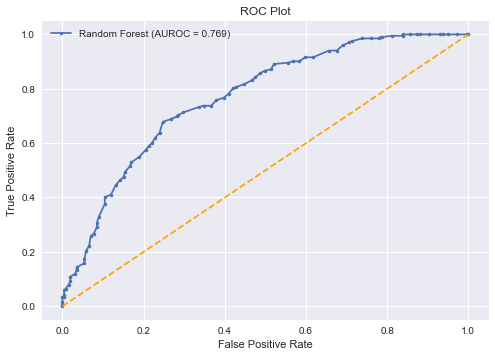

In [15]:
# Printing Precision and Recall
print(classification_report(Label_test, rfPrediction))

# Calculating rf Probabilities
rf_probs = rf.predict_proba(InputData_test)
rf_probs = rf_probs[:, 1]

# Calculating and Displaying Area Under ROC Curve
rf_auc = roc_auc_score(Label_test, rf_probs)
print("Random Forest AUROC = ", rf_auc)

# Calculating FPR and TPR to generate ROC curve
rf_fpr, rf_tpr, _ = roc_curve(Label_test, rf_probs)

# Displaying Reiever Operating Characteristic Curve
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

## Decision Tree Machine Learning 

In [16]:
# Constructing Decision Tree Model and making predictions
dt = DecisionTreeClassifier(random_state=69420)
dt.fit(InputData_train, Label_train)
dtPrediction = dt.predict(InputData_test)

Analyzing Prediction Accuracy

In [17]:
# Calculating Model Accuracy Score
dtAccuracy = accuracy_score(Label_test, dtPrediction)

# Displaying Output
print("Decision Tree Model Accuracy: ", dtAccuracy)

Decision Tree Model Accuracy:  0.6377440347071583


Calculating Precision and Recall

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       259
           1       0.67      0.69      0.68       202

    accuracy                           0.71       461
   macro avg       0.71      0.71      0.71       461
weighted avg       0.71      0.71      0.71       461

Decision Tree AUROC =  0.6323922932833824


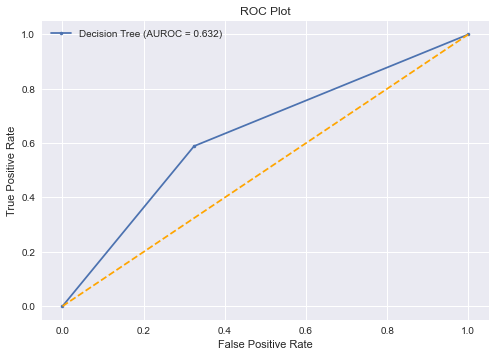

In [18]:
# Printing Precision and Recall
print(classification_report(Label_test, rfPrediction))

# Calculating dt Probabilities
dt_probs = dt.predict_proba(InputData_test)
dt_probs = dt_probs[:, 1]

# Calculating and Displaying Area Under ROC Curve
dt_auc = roc_auc_score(Label_test, dt_probs)
print("Decision Tree AUROC = ", dt_auc)

# Calculating FPR and TPR to generate ROC curve
dt_fpr, dt_tpr, _ = roc_curve(Label_test, dt_probs)

# Displaying Reiever Operating Characteristic Curve
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

Analyzing Feature Importance for the Decision Tree Model

Text(0.5, 0, 'Feature')

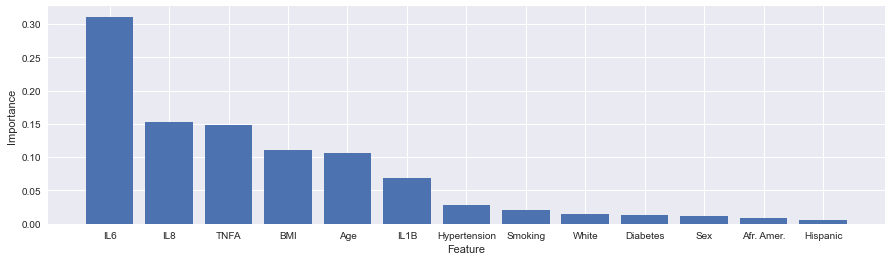

In [19]:
# Generating Feature Importances and Sorting
OrderOfImportance = np.argsort(-dt.feature_importances_)

# Generating Dataframe with Feature Values
features = df.columns[:-1][OrderOfImportance]
values = dt.feature_importances_[OrderOfImportance]

# Generating Bar Plot to Display Feature Importance
plt.figure(figsize=(15, 4))
plt.bar(range(len(OrderOfImportance)), values)
plt.xticks(range(len(OrderOfImportance)), features)
plt.ylabel('Importance')
plt.xlabel('Feature')

## Deep Neural Network Machine Learning

Construction of Neural Network Model

In [20]:
# Model Architecture 
def NeuralNet_model():
  model = Sequential([
    Dense(512,  activation='relu', input_dim=13),
    Dropout(0.1),
    Dense(128,  activation='relu'),
    Dropout(0.1),
    Dense(64,   activation='relu'),
    Dropout(0.1),
    Dense(32,   activation='relu'),
    Dropout(0.1),
    Dense(1, activation = 'hard_sigmoid')
  ])

  # Model Compiler
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

# Fitting Model
nn_model = NeuralNet_model()
nn_model.fit(InputData_train, Label_train, epochs=10)


Epoch 1/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6591
Epoch 2/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5969
Epoch 3/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5849
Epoch 4/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6065
Epoch 5/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6015
Epoch 6/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6069
Epoch 7/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5665
Epoch 8/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5523
Epoch 9/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5550
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5668


In [21]:
# Making Predictions Based on the Model
NeuralNetPrediction = nn_model.predict(InputData_test).ravel()

Analyzing Prediction Accuracy

In [22]:
# Interpreting prediction outputs >=0.5 as severe and <0.5 as mild
NeuralNetPrediction_Binaries = []
for x in NeuralNetPrediction:
    if x >= 0.5:
        NeuralNetPrediction_Binary = 1
        NeuralNetPrediction_Binaries.append(NeuralNetPrediction_Binary)
    if x < 0.5:
        NeuralNetPrediction_Binary = 0
        NeuralNetPrediction_Binaries.append(NeuralNetPrediction_Binary)

# Calculating Model Accuracy Score
NeuralNetAccuracy = accuracy_score(Label_test, NeuralNetPrediction_Binaries)

# Displaying Output
print("Deep Neural Network Model Accuracy: ", NeuralNetAccuracy)

Deep Neural Network Model Accuracy:  0.7093275488069414


Calculating Precision and Recall

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       259
           1       0.67      0.66      0.67       202

    accuracy                           0.71       461
   macro avg       0.70      0.70      0.70       461
weighted avg       0.71      0.71      0.71       461



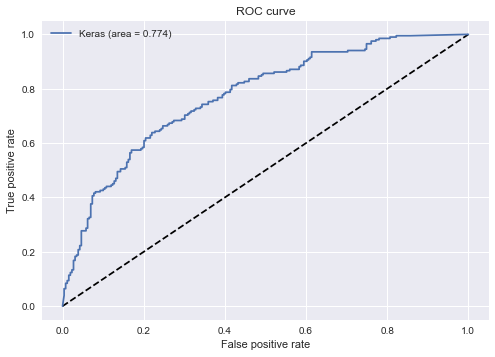

In [23]:
# Printing Precision and Recall
print(classification_report(Label_test, NeuralNetPrediction_Binaries))

# Converting Label_test list to float values
Label_test_float = []
for x in Label_test:
    Label_test_float.append(float(x))

# Calculating ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Label_test_float, NeuralNetPrediction)
auc_nn = auc(fpr_nn, tpr_nn)

# Displaying ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Keras (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Comparative Analysis

Displaying ROC curves from all Machine Learning Models

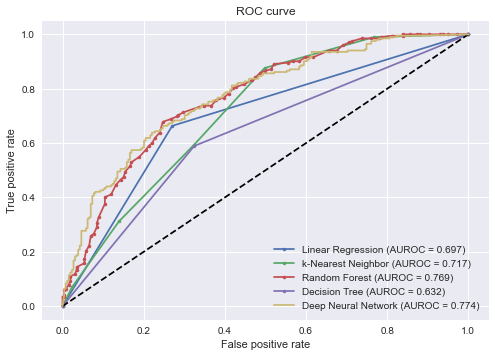

In [24]:
# Linear Regression
plt.plot(Lin_fpr, Lin_tpr, marker='.', label='Linear Regression (AUROC = %0.3f)' % Lin_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# k-Nearest Neighbors
plt.plot(kNN_fpr, kNN_tpr, marker='.', label='k-Nearest Neighbor (AUROC = %0.3f)' % kNN_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Random Forest
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Decision Tree
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Deep Neural Network
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Deep Neural Network (AUROC = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()